In [103]:
%matplotlib inline
from matplotlib.backends.backend_pgf import PdfPages
import matplotlib.pyplot as plt
import PyPDF2 
import pickle
import github_analysis.freq_graph as fg
import github_analysis.motif_finder as mf
from importlib import reload
import joypy
import pandas as pd
import seaborn as sns
import numpy as np
import github_analysis.data_layer as dl

import warnings
warnings.filterwarnings('ignore')

### Notes

Get # of branches
Get branch length before merge

In [104]:
emb = pd.read_csv('results/embeddings.csv')
project_ids = emb.type.values
#",".join(project_ids.astype(str))

In [108]:
#Load data
# clusters looks like {cluster_id:[123,456,...]} where 123 and 456 are proj ids in that cluster
pickle_in = open("./results/motifs_by_cluster.pickle","rb")
motifs_by_cluster = pickle.load(pickle_in)

pickle_in = open("./results/clusters.pickle","rb")
clusters = pickle.load(pickle_in)

# Load Data
# comm_auth_by_proj = pd.read_csv('data/author_commits_by_proj.csv').set_index('p_id')
# pr_cr_by_proj = pd.read_csv('data/pr_cr_by_proj.csv').set_index('p_id')
# issues_by_proj = pd.read_csv('data/issues_by_proj.csv').set_index('p_id')
# owner_age_by_proj = pd.read_csv('data/owner_age_by_proj.csv').set_index('p_id')
comm_auth_by_proj = pd.read_csv('data/author_commits_by_proj_100.csv').set_index('p_id')
pr_cr_by_proj = pd.read_csv('data/pr_cr_by_proj_100.csv').set_index('p_id')
issues_by_proj = pd.read_csv('data/issues_by_proj_100.csv').set_index('p_id')
owner_age_by_proj = pd.read_csv('data/owner_age_by_proj_100.csv').set_index('p_id')
time_betw_commits_by_proj = pd.read_csv('data/time_between_commits_100.csv').set_index('p_id')


project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj,owner_age_by_proj,time_betw_commits_by_proj],axis=1)
#project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj],axis=1)

In [109]:
#",".join(list(project.index.astype(str)))

# Overall

In [110]:
project.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,8306.000000,8306.000000,8306.000000,8306.000000,8306.000000,8097.000000,8274.000000,8274.000000
mean,396.723212,6.430412,7.013003,11.198411,33.887431,610.604545,0.153251,2.838109
std,2608.231036,23.804791,117.606270,665.259014,229.919460,589.020471,1.544132,6.201662
min,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.000000,1.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.432302
50%,161.000000,3.000000,0.000000,0.000000,1.000000,446.000000,0.000000,1.316987
75%,276.000000,5.000000,1.000000,0.000000,17.000000,969.000000,0.000000,3.297374
max,126664.000000,947.000000,10369.000000,60480.000000,12997.000000,2951.000000,91.000000,228.166667


## Motif

This is an explanation of motifs 

In [13]:
data_path = "../RStudio-Data-Repository/clean_data/commits.feather"
commits_dl = dl.data_layer(data_path,min_number_commits=100)
motifs_overall = mf.get_motifs(project.index.values,5,1000,commits_dl)

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

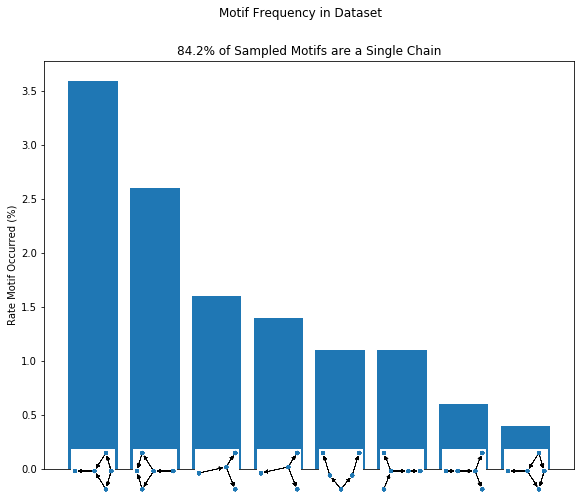

In [14]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_overall)

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

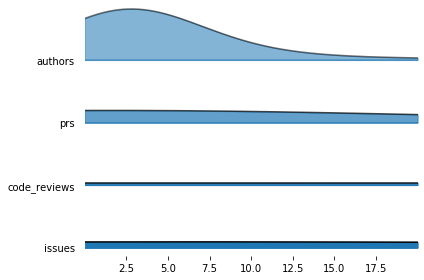

In [111]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(project[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

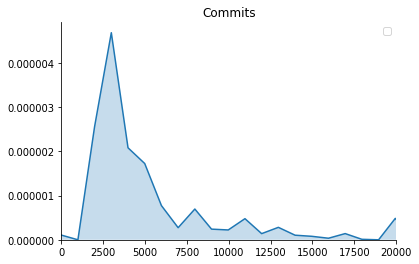

In [114]:
ax = sns.kdeplot(project.commits,shade=True,)
ax.set_xlim([0,20000])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

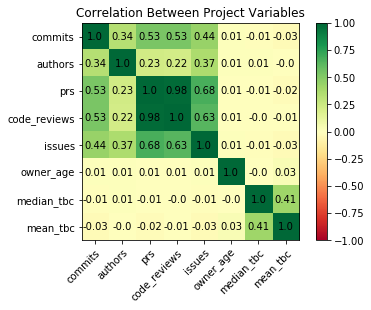

In [115]:
p = project.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(project.columns)))
ax.set_yticks(np.arange(len(project.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(project.columns,rotation='vertical')
ax.set_yticklabels(project.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(project.columns)):
    for j in range(len(project.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

## Representative Projects

---

# Cluster 0

In [116]:
cluster0 = project[project.index.isin(clusters[0])]

In [117]:
cluster0.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,845.000000,845.000000,845.000000,845.000000,845.000000,831.000000,843.000000,843.000000
mean,271.543195,5.312426,0.765680,0.068639,9.210651,513.738869,0.081851,1.894263
std,361.058895,7.179117,4.796771,0.859860,27.504556,517.575288,0.406819,2.819588
min,88.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007937
25%,121.000000,2.000000,0.000000,0.000000,0.000000,76.500000,0.000000,0.360949
50%,169.000000,4.000000,0.000000,0.000000,0.000000,359.000000,0.000000,0.900000
75%,286.000000,6.000000,0.000000,0.000000,4.000000,813.500000,0.000000,2.290000
max,5966.000000,82.000000,122.000000,22.000000,266.000000,2951.000000,7.000000,32.394737


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

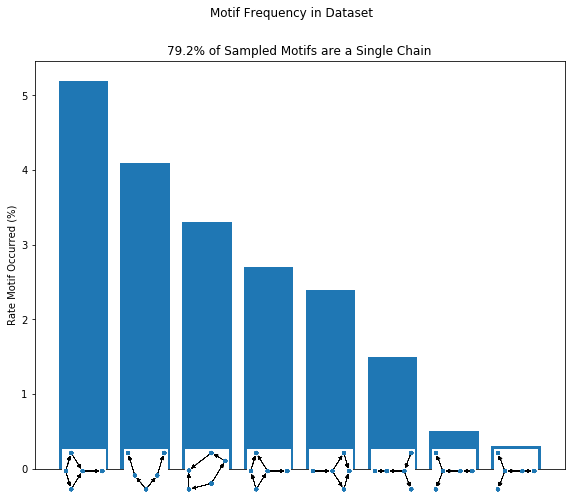

In [118]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[0])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

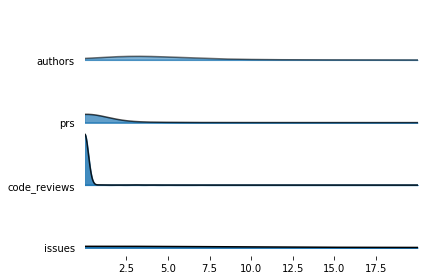

In [119]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster0[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

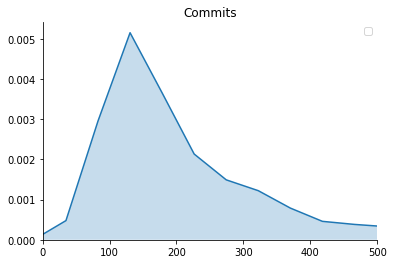

In [120]:
ax = sns.kdeplot(cluster0.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

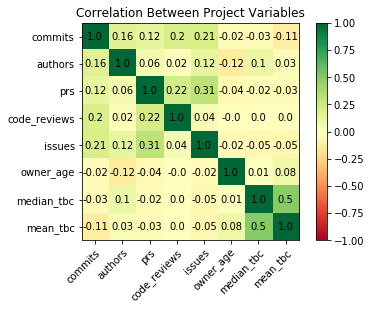

In [122]:
p = cluster0.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

### Activity Index

In [128]:
print('Average Days Betw Commits: ' + str(round(cluster0.mean_tbc.mean(),2)))

Average Days Betw Commits: 1.89


### Experience Index

In [132]:
print('Average Author Age (Days): ' + str(round(cluster0.owner_age.mean(),2)))

Average Author Age (Days): 513.74


## Representative Projects

---

# Cluster 1

In [136]:
cluster1 = project[project.index.isin(clusters[1])]

In [137]:
cluster1.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,471.000000,471.000000,471.000000,471.000000,471.000000,442.000000,469.000000,469.000000
mean,353.118896,12.605096,11.738854,2.422505,95.205945,554.024887,0.168443,3.137441
std,1068.930003,41.224929,35.459743,17.680312,199.149281,572.956985,0.514102,3.518614
min,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.000000,2.000000,0.000000,0.000000,2.000000,44.000000,0.000000,0.656051
50%,148.000000,4.000000,1.000000,0.000000,36.000000,362.500000,0.000000,1.807339
75%,276.000000,9.500000,9.500000,0.000000,89.500000,924.500000,0.000000,4.601770
max,16937.000000,700.000000,565.000000,294.000000,1774.000000,2550.000000,5.000000,21.417910


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

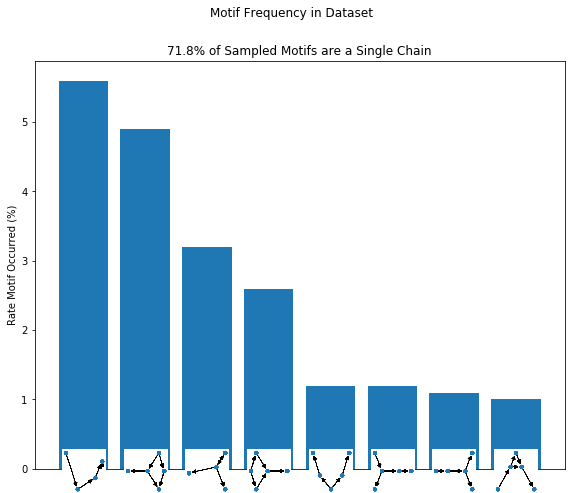

In [138]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[1])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

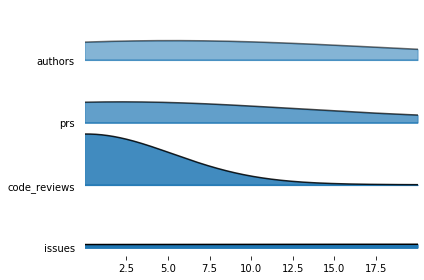

In [139]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster1[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

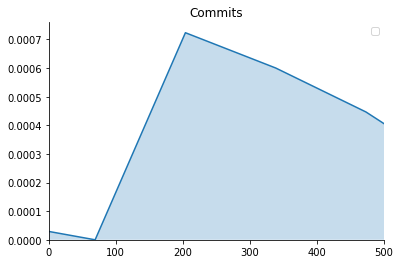

In [140]:
ax = sns.kdeplot(cluster1.commits,shade=True)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

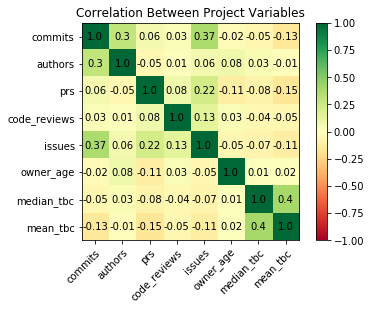

In [141]:
p = cluster1.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

### Activity Index

In [142]:
print('Average Days Betw Commits: ' + str(round(cluster1.mean_tbc.mean(),2)))

Average Days Betw Commits: 3.14


### Experience Index

In [143]:
print('Average Author Age (Days): ' + str(round(cluster1.owner_age.mean(),2)))

Average Author Age (Days): 554.02


## Representative Projects

---

# Cluster 2

In [144]:
cluster2 = project[project.index.isin(clusters[2])]

In [145]:
cluster2.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,862.000000,862.000000,862.000000,862.000000,862.000000,842.000000,862.000000,862.000000
mean,321.860789,8.603248,2.109049,2.654292,22.674014,752.719715,0.099768,2.897505
std,826.469281,44.195116,8.235764,28.970749,160.957015,667.343649,0.459030,3.536694
min,90.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005102
25%,126.000000,1.000000,0.000000,0.000000,0.000000,180.250000,0.000000,0.722980
50%,169.000000,2.000000,0.000000,0.000000,1.000000,584.500000,0.000000,1.764017
75%,291.750000,4.000000,1.000000,0.000000,13.000000,1205.750000,0.000000,3.851938
max,19730.000000,947.000000,117.000000,733.000000,4470.000000,2909.000000,6.000000,48.971429


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

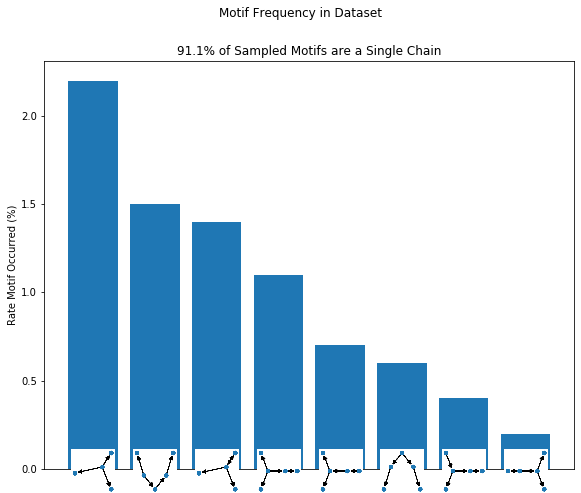

In [146]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[2])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

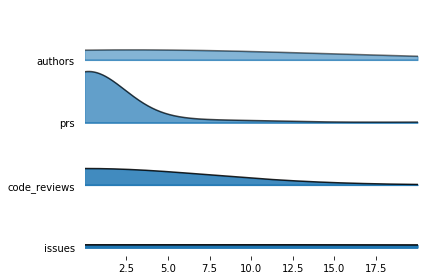

In [147]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster2[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

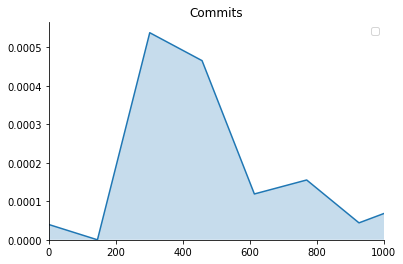

In [148]:
ax = sns.kdeplot(cluster2.commits,shade=True,)
ax.set_xlim([0,1000])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

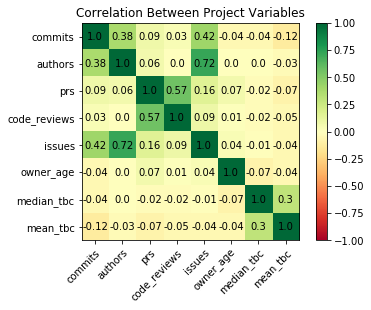

In [149]:
p = cluster2.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

### Activity Index

In [150]:
print('Average Days Betw Commits: ' + str(round(cluster2.mean_tbc.mean(),2)))

Average Days Betw Commits: 2.9


### Experience Index

In [151]:
print('Average Author Age (Days): ' + str(round(cluster2.owner_age.mean(),2)))

Average Author Age (Days): 752.72


## Representative Projects

---

# Cluster 3

In [152]:
cluster3 = project[project.index.isin(clusters[3])]

In [153]:
cluster3.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,520.000000,520.000000,520.000000,520.000000,520.000000,504.000000,520.000000,520.000000
mean,601.780769,10.925000,45.725000,41.907692,119.344231,712.966270,0.021154,1.759390
std,2894.447074,37.502218,95.220641,175.147224,483.268575,658.292865,0.156843,2.399784
min,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,2.000000,10.000000,0.000000,18.000000,136.750000,0.000000,0.249002
50%,164.500000,4.000000,26.000000,0.000000,38.000000,572.000000,0.000000,0.855019
75%,311.000000,9.000000,48.000000,14.000000,75.250000,1121.500000,0.000000,2.377935
max,44267.000000,662.000000,1015.000000,2518.000000,8762.000000,2951.000000,2.000000,13.992126


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

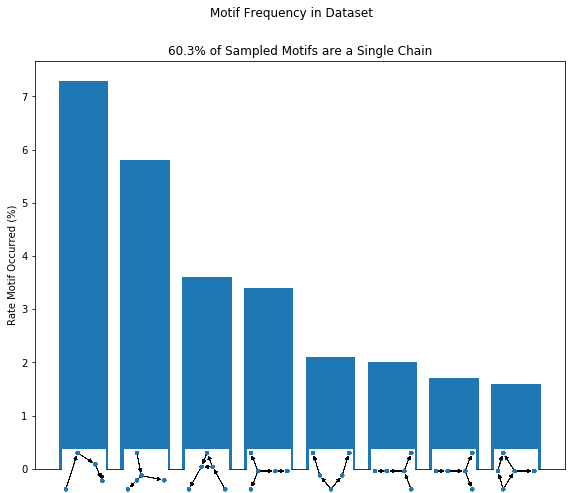

In [154]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[3])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

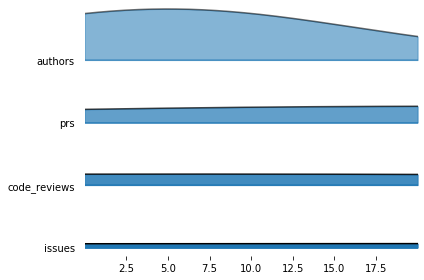

In [155]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster3[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

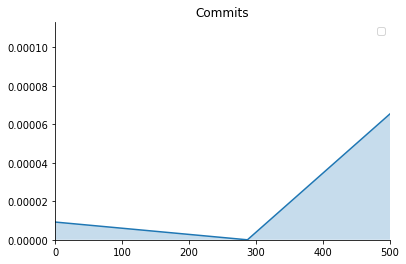

In [156]:
ax = sns.kdeplot(cluster3.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

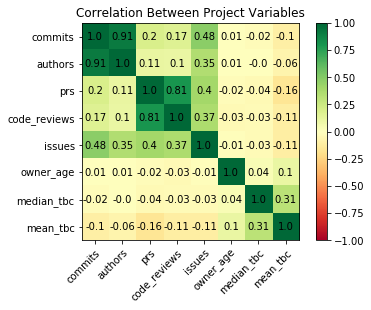

In [157]:
p = cluster3.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

### Activity Index

In [158]:
print('Average Days Betw Commits: ' + str(round(cluster3.mean_tbc.mean(),2)))

Average Days Betw Commits: 1.76


### Experience Index

In [159]:
print('Average Author Age (Days): ' + str(round(cluster3.owner_age.mean(),2)))

Average Author Age (Days): 712.97


## Representative Projects

---

# Cluster 4

In [160]:
cluster4 = project[project.index.isin(clusters[4])]

In [161]:
cluster4.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,768.000000,768.000000,768.000000,768.000000,768.000000,758.000000,766.000000,766.000000
mean,281.644531,4.450521,1.110677,0.253906,12.529948,513.445910,0.116188,2.779536
std,331.704924,4.235585,4.549251,3.250411,46.831682,498.063239,0.560881,4.670852
min,84.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005747
25%,120.750000,2.000000,0.000000,0.000000,0.000000,85.500000,0.000000,0.535657
50%,172.000000,3.000000,0.000000,0.000000,0.000000,382.000000,0.000000,1.439366
75%,302.500000,5.000000,0.000000,0.000000,6.250000,794.500000,0.000000,3.201616
max,3425.000000,36.000000,80.000000,68.000000,987.000000,2482.000000,10.000000,66.750000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

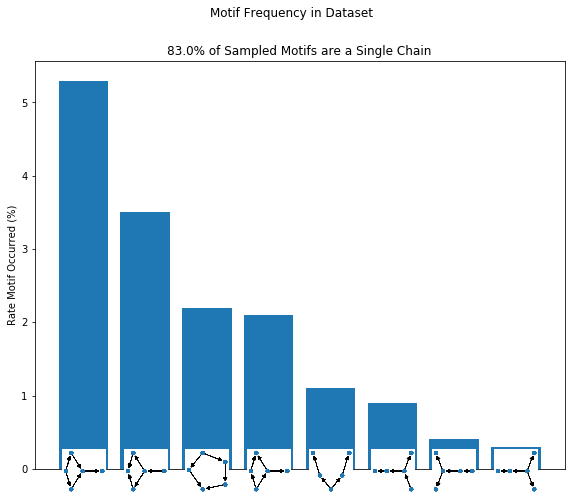

In [162]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[4])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

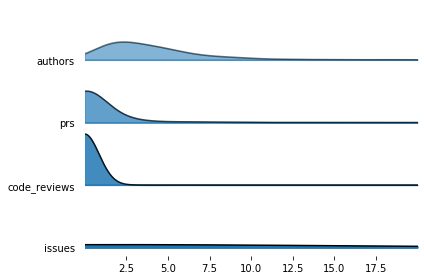

In [163]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster4[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

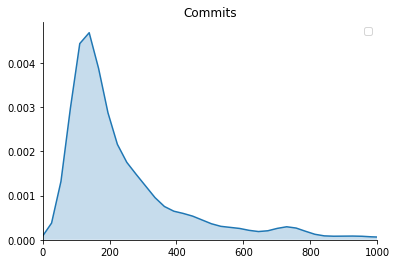

In [164]:
ax = sns.kdeplot(cluster4.commits,shade=True,)
ax.set_xlim([0,1000])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

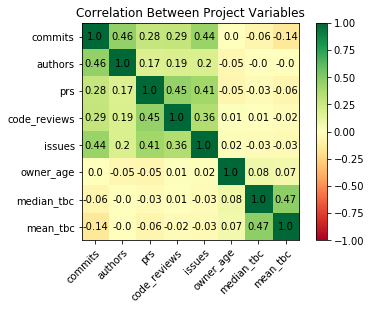

In [165]:
p = cluster4.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

### Activity Index

In [166]:
print('Average Days Betw Commits: ' + str(round(cluster4.mean_tbc.mean(),2)))

Average Days Betw Commits: 2.78


### Experience Index

In [167]:
print('Average Author Age (Days): ' + str(round(cluster4.owner_age.mean(),2)))

Average Author Age (Days): 513.45


## Representative Projects

---

# Cluster 5

In [168]:
cluster5 = project[project.index.isin(clusters[5])]

In [169]:
cluster5.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1428.000000,1432.000000,1432.000000
mean,681.075069,4.674242,7.296832,41.668044,10.753444,626.952381,0.406425,3.761782
std,5705.448440,21.683439,272.119297,1587.188066,341.188982,604.721109,3.465257,10.320574
min,99.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.000000,1.000000,0.000000,0.000000,0.000000,81.750000,0.000000,0.385141
50%,151.500000,1.000000,0.000000,0.000000,0.000000,460.000000,0.000000,1.264171
75%,239.000000,2.000000,0.000000,0.000000,0.000000,1028.750000,0.000000,3.501623
max,126664.000000,475.000000,10369.000000,60480.000000,12997.000000,2713.000000,91.000000,173.833333


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

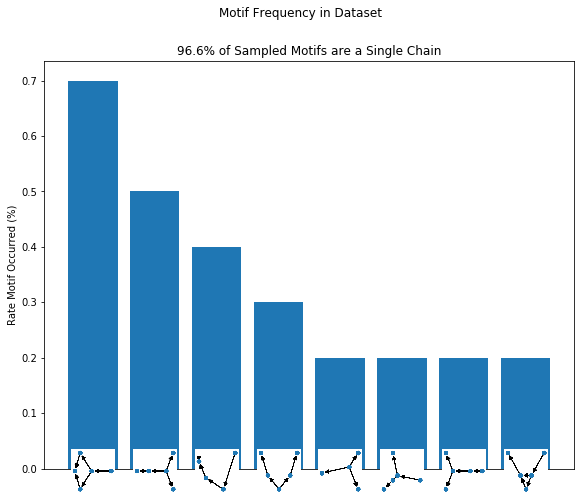

In [170]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[5])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

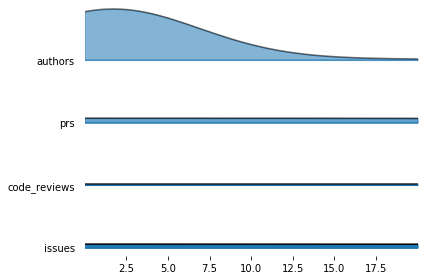

In [171]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster5[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

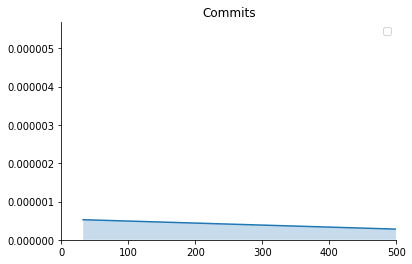

In [172]:
ax = sns.kdeplot(cluster5.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

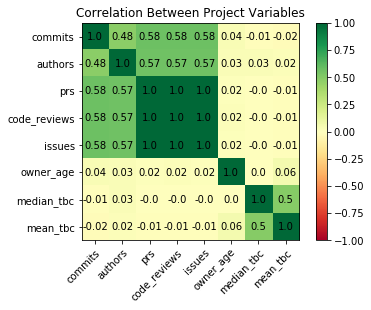

In [173]:
p = cluster5.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

### Activity Index

In [174]:
print('Average Days Betw Commits: ' + str(round(cluster5.mean_tbc.mean(),2)))

Average Days Betw Commits: 3.76


### Experience Index

In [175]:
print('Average Author Age (Days): ' + str(round(cluster5.owner_age.mean(),2)))

Average Author Age (Days): 626.95


## Representative Projects

---

# Cluster 6

In [177]:
cluster6 = project[project.index.isin(clusters[6])]

In [178]:
cluster6.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,841.000000,841.000000,841.000000,841.000000,841.000000,815.000000,838.000000,838.000000
mean,319.346017,4.442331,6.800238,3.507729,27.234245,733.476074,0.072792,3.302935
std,991.640672,9.083964,16.589456,21.898364,62.442763,607.606996,0.574820,9.143193
min,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.000000,1.000000,0.000000,0.000000,1.000000,206.000000,0.000000,0.678952
50%,167.000000,3.000000,1.000000,0.000000,9.000000,682.000000,0.000000,1.687974
75%,279.000000,5.000000,7.000000,0.000000,27.000000,1096.500000,0.000000,3.672912
max,24983.000000,215.000000,164.000000,332.000000,827.000000,2651.000000,12.000000,228.166667


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

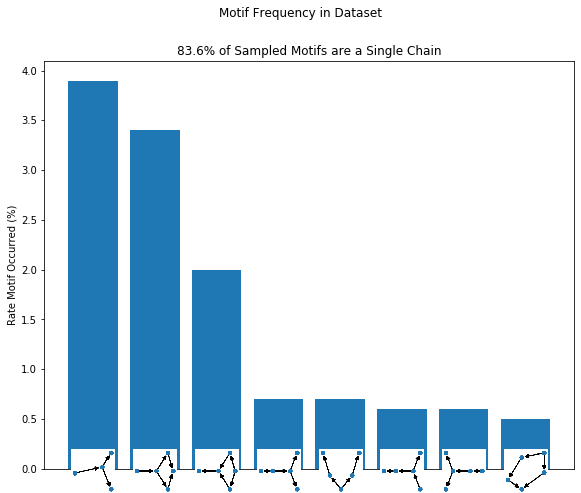

In [179]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[6])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

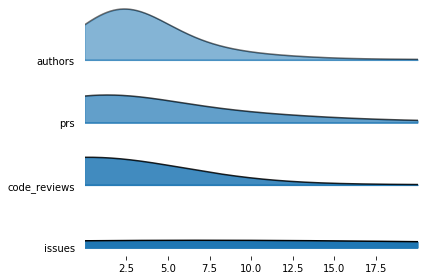

In [180]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster6[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

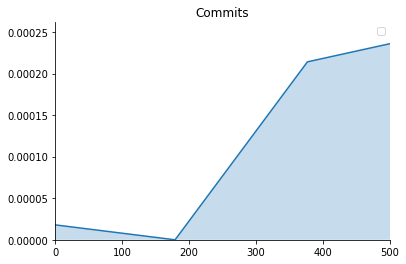

In [181]:
ax = sns.kdeplot(cluster6.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

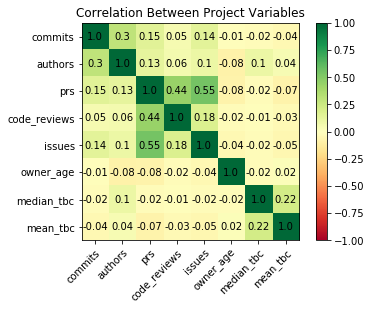

In [182]:
p = cluster6.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

### Activity Index

In [183]:
print('Average Days Betw Commits: ' + str(round(cluster6.mean_tbc.mean(),2)))

Average Days Betw Commits: 3.3


### Experience Index

In [184]:
print('Average Author Age (Days): ' + str(round(cluster6.owner_age.mean(),2)))

Average Author Age (Days): 733.48


## Representative Projects

---

# Cluster 7

In [185]:
cluster7 = project[project.index.isin(clusters[7])]

In [186]:
cluster7.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,697.000000,697.000000,697.000000,697.000000,697.000000,687.000000,696.000000,696.000000
mean,318.186514,6.779053,2.332855,0.173601,7.692970,438.823872,0.027299,0.761490
std,1600.077728,15.992095,11.747755,2.529139,36.851876,494.344726,0.216184,1.531311
min,78.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,3.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.107245
50%,149.000000,4.000000,0.000000,0.000000,0.000000,292.000000,0.000000,0.276037
75%,258.000000,6.000000,0.000000,0.000000,2.000000,678.500000,0.000000,0.645134
max,39988.000000,318.000000,166.000000,57.000000,610.000000,2764.000000,3.000000,13.531746


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

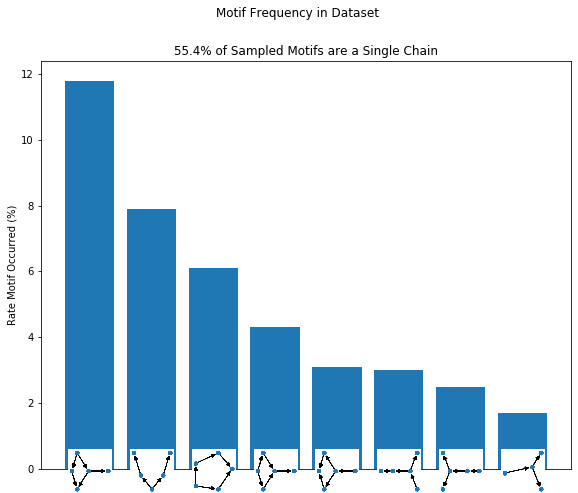

In [187]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[7])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

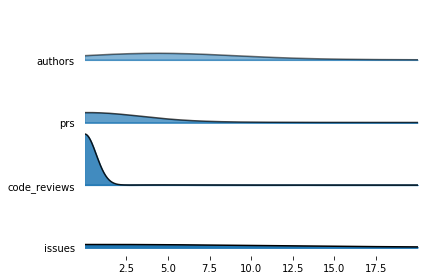

In [188]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster7[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

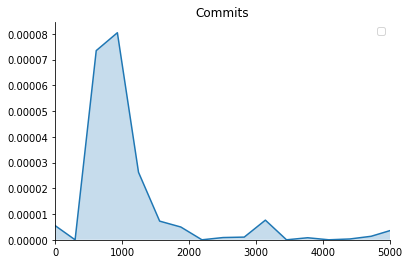

In [209]:
ax = sns.kdeplot(cluster7.commits,shade=True,)
ax.set_xlim([0,5000])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

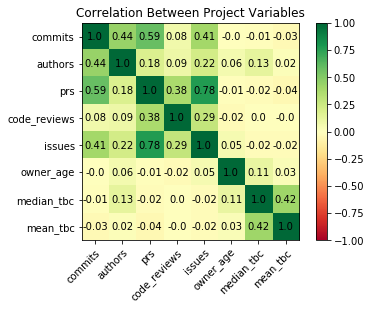

In [190]:
p = cluster7.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

### Activity Index

In [191]:
print('Average Days Betw Commits: ' + str(round(cluster7.mean_tbc.mean(),2)))

Average Days Betw Commits: 0.76


### Experience Index

In [192]:
print('Average Author Age (Days): ' + str(round(cluster7.owner_age.mean(),2)))

Average Author Age (Days): 438.82


## Representative Projects

---

# Cluster 8

In [193]:
cluster8 = project[project.index.isin(clusters[8])]

In [194]:
cluster8.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,712.000000,712.000000,712.000000,712.000000,712.000000,672.000000,712.000000,712.000000
mean,452.421348,9.823034,10.362360,5.526685,122.355337,627.278274,0.088483,3.595139
std,838.522210,19.516364,32.534316,28.797794,348.842678,593.013302,0.399412,4.166514
min,75.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.000000,3.000000,0.000000,0.000000,9.000000,101.000000,0.000000,0.822261
50%,194.500000,5.000000,1.000000,0.000000,34.000000,489.500000,0.000000,2.165886
75%,419.250000,10.000000,7.000000,0.000000,94.000000,1012.000000,0.000000,4.725531
max,11496.000000,320.000000,541.000000,433.000000,6817.000000,2762.000000,5.000000,35.411765


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

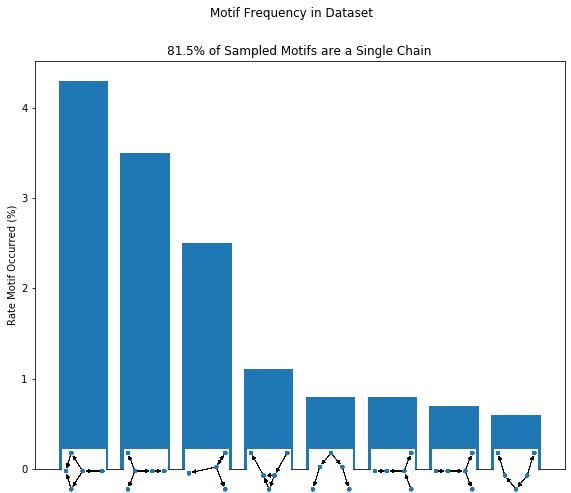

In [195]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[8])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

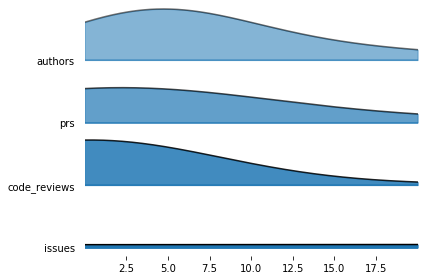

In [196]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster8[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

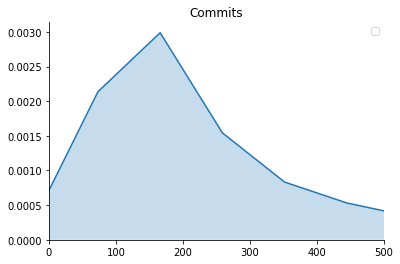

In [197]:
ax = sns.kdeplot(cluster8.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

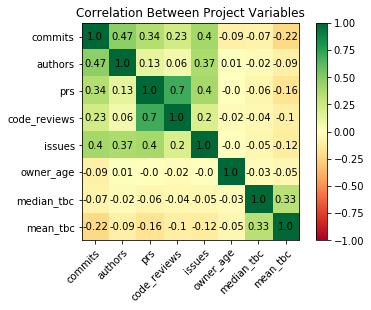

In [198]:
p = cluster8.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

### Activity Index

In [199]:
print('Average Days Betw Commits: ' + str(round(cluster8.mean_tbc.mean(),2)))

Average Days Betw Commits: 3.6


### Experience Index

In [200]:
print('Average Author Age (Days): ' + str(round(cluster8.owner_age.mean(),2)))

Average Author Age (Days): 627.28


## Representative Projects

---

# Cluster 9

In [201]:
cluster9 = project[project.index.isin(clusters[9])]

In [202]:
cluster9.describe()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
count,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1118.000000,1136.000000,1136.000000
mean,256.015817,3.715290,0.270650,0.028120,5.817223,602.753131,0.183979,3.193723
std,502.132688,12.480336,2.617282,0.583487,22.796912,570.556315,1.067150,5.352967
min,92.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667
25%,117.000000,1.000000,0.000000,0.000000,0.000000,115.500000,0.000000,0.658743
50%,147.000000,2.000000,0.000000,0.000000,0.000000,459.500000,0.000000,1.757616
75%,232.750000,3.000000,0.000000,0.000000,2.000000,945.500000,0.000000,3.862103
max,8138.000000,358.000000,74.000000,17.000000,406.000000,2856.000000,28.000000,86.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

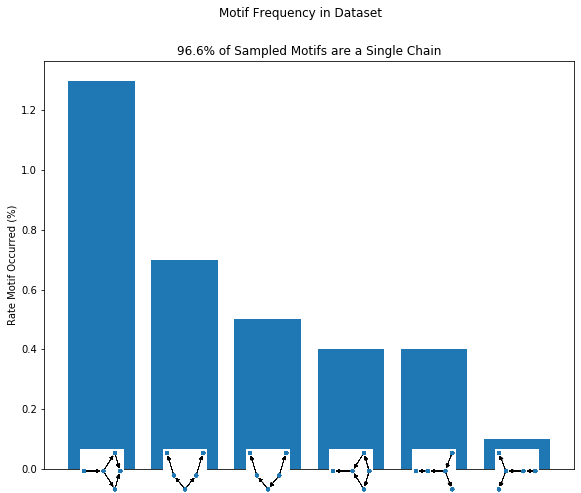

In [203]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[9])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

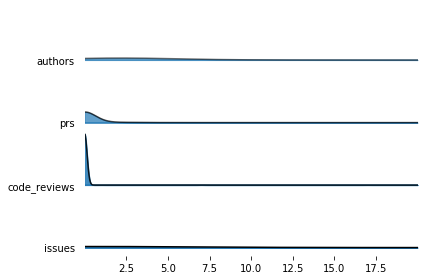

In [204]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster9[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

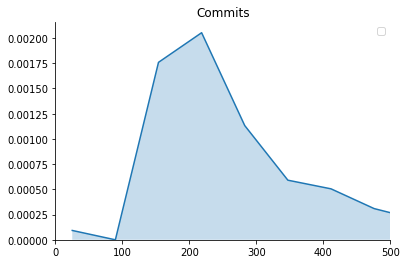

In [205]:
ax = sns.kdeplot(cluster9.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

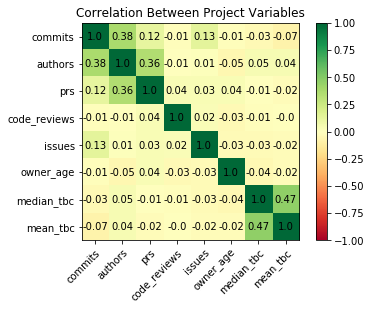

In [206]:
p = cluster9.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

### Activity Index

In [207]:
print('Average Days Betw Commits: ' + str(round(cluster9.mean_tbc.mean(),2)))

Average Days Betw Commits: 3.19


### Experience Index

In [208]:
print('Average Author Age (Days): ' + str(round(cluster9.owner_age.mean(),2)))

Average Author Age (Days): 602.75


## Representative Projects

---

# Compare Clusters 2 and 3

In [79]:
cluster2.head()

,commits,authors,prs,code_reviews,issues
p_id,,,,,
3174,2908,383,19,0,477
3697,3100,44,24,0,544
5606,2637,2,0,0,448
11737,1211,8,2,0,43
16545,830,2,0,0,13


In [80]:
#",".join(list(cluster2.index.values.astype(str)))

In [81]:
cluster3.head()

,commits,authors,prs,code_reviews,issues
p_id,,,,,
581,41746,383,142,67,3598
21621,5067,23,58,0,2138
43424,501,2,57,0,58
44415,369,11,17,9,64
59756,774,38,105,46,110


In [82]:
#",".join(list(cluster3.sample(160).index.values.astype(str)))

### Compare big projects

In [83]:
cluster2[(cluster2.commits>100)].head()

,commits,authors,prs,code_reviews,issues
p_id,,,,,
3174,2908,383,19,0,477
3697,3100,44,24,0,544
5606,2637,2,0,0,448
11737,1211,8,2,0,43
16545,830,2,0,0,13


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

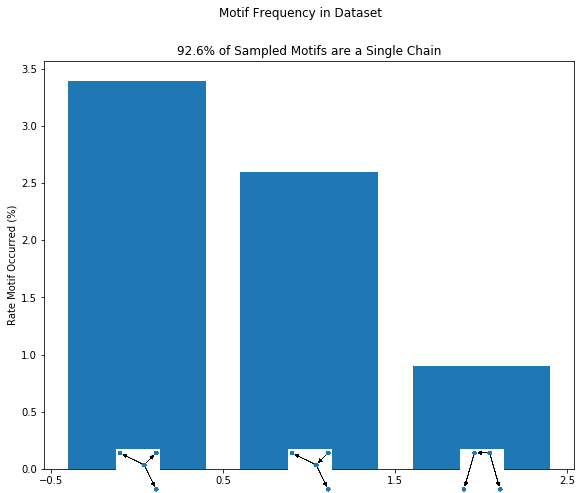

In [84]:
motif_cluster2 = mf.get_motifs(cluster2.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_cluster2,motifs_to_show=3)

In [85]:
cluster3[(cluster3.commits>100)].head()

,commits,authors,prs,code_reviews,issues
p_id,,,,,
581,41746,383,142,67,3598
21621,5067,23,58,0,2138
43424,501,2,57,0,58
44415,369,11,17,9,64
59756,774,38,105,46,110


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

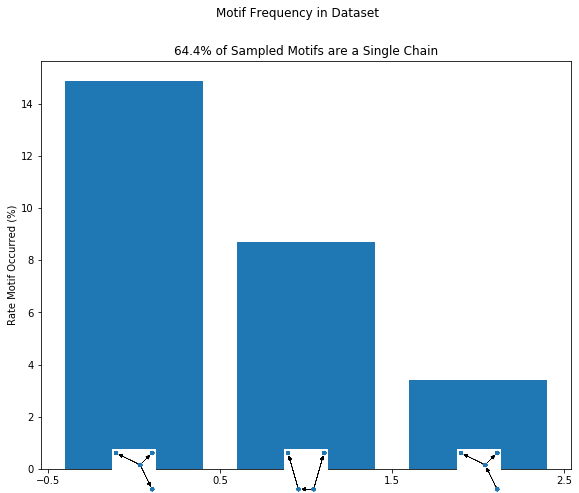

In [86]:
motif_cluster3 = mf.get_motifs(cluster3.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_cluster3,motifs_to_show=3)

Why does the less interesting cluster have more interesting motifs?

Cluster 2

https://github.com/arresteddevops/podcast
https://github.com/coderyuhui/test
https://github.com/SomethingExplosive/android_device_moto_shamu-kernel
https://github.com/marqueexss/----marquee-xss
https://github.com/fzanetti/obligatorioA2
https://github.com/Git-Training-Aug4/Web-Training
https://github.com/turingschool/mentor-appointments
https://github.com/saylordotorg/course_bio305
https://github.com/schultz-it/detainsearchescortDZE
https://github.com/MirtlBu/dating
https://github.com/gbecchio/git_openclassroom3
https://github.com/bschmitt/laravel-amqp
https://github.com/wafto/temoa
https://github.com/jamesmgittins/dopeslingertycoon
https://github.com/Babouchot/twerking-panzerbrigade
https://github.com/awslabs/aws-big-data-blog
https://github.com/JakeWharton/RxBinding
https://github.com/wso2/wso2-rampart
https://github.com/sanger-pathogens/Bio-RNASeq
https://github.com/veetase/community
https://github.com/gouf/tweet_weather_bot
https://github.com/Lewis-Ho/Reverse
https://github.com/Autumn/cammap
https://github.com/wagnerrp/pytmdb3
https://github.com/Opinari/OnTheFenceUI
https://github.com/scriby/browser-harness
https://github.com/fb-hackathon-hcii/collablocks
https://github.com/dwyl/learn-tdd
https://github.com/reidcovington/smartipantsgame
https://github.com/Reactive-Extensions/rx.angular.js
https://github.com/clubee/EvoAlerta
https://github.com/RuiAAPeres/KirKos
https://github.com/wordpress-mobile/WordPress-iOS
https://github.com/anoopg87/phonestatelistener
https://github.com/sLite/gitflow-demo
https://github.com/letterj/oohhc
https://github.com/jihye-eventsource/mvp
https://github.com/daneal2u/android_vendor_du
https://github.com/CodeSammich/amber_shine
https://github.com/clifton26/WeightLossWebApp
https://github.com/eaho1/Spooky-Spoils
https://github.com/maturano/symfony-base
https://github.com/concrete5-composer/concrete5-core
https://github.com/QuatreCentQuatre/caspian
https://github.com/toppatch/toppatch-server
https://github.com/garguelles/shoutbux
https://github.com/noteworthynicole/final-project
https://github.com/PawanHUB/MergeTest
https://github.com/mougeCM/muni-admin
https://github.com/ChevalCorp/RayTracer
https://github.com/RequireSun/SchoolHomepage
https://github.com/chasmodo/android_art
https://github.com/lbar314/thesis_project
https://github.com/KayEss/fost-web
https://github.com/wangjinlong9788/wangjinlong9788.github.io
https://github.com/anair13/splititwitme
https://github.com/ivan-uskov/dnaclub
https://github.com/WellCommerce/ComposerPlugin
https://github.com/jazzsequence/museum-core
https://github.com/vampd/drupal
https://github.com/afaan5556/afaan5556.github.io
https://github.com/grails/grails-core
https://github.com/smartnsoft/hackathon-direct-energie-2013
https://github.com/alanstevens/ChocoPackages
https://github.com/eskimosoup/tra
https://github.com/lnbcoding/raccoon_twitter
https://github.com/red-spotted-newts-2014/strong-times
https://github.com/serge-v/dotfiles
https://github.com/tomrittervg/decrypt-windows-ec2-passwd
https://github.com/mkremins/flense-nw
https://github.com/emacs-jp/migemo
https://github.com/JoelEinbinder/JS100
https://github.com/pcnicklaus/tech.jobbing
https://github.com/combatdave/Reconesse
https://github.com/rpanjwani/madlibs
https://github.com/byuidealabs/tdf
https://github.com/DeviceConnect/DeviceConnect-JS
https://github.com/Yuth-Set/cms
https://github.com/awm4j/Asiph-Game
https://github.com/measurement-kit/network-meter
https://github.com/chiafang/IOS
https://github.com/humble-bundle-forms/HumbleForms
https://github.com/karudedios/dnc
https://github.com/cismet/cidsbean-json-patch
https://github.com/DarriusWrightGD/learning-directx12
https://github.com/abclive/Lightning
https://github.com/dylanjha/tweetwhat
https://github.com/raylwalters/groupProject
https://github.com/Camachof/aaProjects
https://github.com/skthinks/Movies
https://github.com/robi09/rohas-lite
https://github.com/ssj71/OSC2MIDI
https://github.com/hxx0215/MuPDFMirror
https://github.com/alexandrdragin/Absolutix-s-site
https://github.com/firegento/firegento-dynamiccategory
https://github.com/suryametla/test
https://github.com/mrsonicblue/theaquanauts
https://github.com/SalesforceFoundation/CampaignTools
https://github.com/WhaleLLC/Whalellc.github.io
https://github.com/pbinkley/jekyll-book-marriage
https://github.com/dacechavez/silverfi
https://github.com/TheTyee/election.thetyee.ca
https://github.com/edupugantiv/hicomm_web
https://github.com/smonette/microblog_lab
https://github.com/nguy/artview
https://github.com/cobbdb/jsinclude
https://github.com/zayng/autotest
https://github.com/VoQn/js-practice
https://github.com/x-hansong/EasyChat
https://github.com/Ostrovski/cancharts
https://github.com/chovancova/IT_CAMP
https://github.com/vispy/vispy.js
https://github.com/Manawasp/goodrecipes-api
https://github.com/SethArchambault/CastleFortify
https://github.com/soyto/soyto.github.io
https://github.com/blakebuck/grade-a-lator
https://github.com/bizancomSmartPhoneAppDeveloper1/TripShot
https://github.com/genesix/genesixCommon
https://github.com/maternitynet/maternitynet.github.io
https://github.com/youyidecai/yigeWechat
https://github.com/jogojokodi/jogojokodi
https://github.com/kentcdodds/all-contributors
https://github.com/nicolewalter/MyProject
https://github.com/devvoh/parable
https://github.com/CKOTech/checkout-woocommerce-plugin
https://github.com/doTell/doTell
https://github.com/pagekit/extension-tinymce
https://github.com/zhoushuangfe/footballSNS
https://github.com/Jeffrey-Hackford/NetRush
https://github.com/deahoum/Project-Tera
https://github.com/takeroibuki/work
https://github.com/Callisto13/Battleships
https://github.com/kaplali/parkstorm
https://github.com/microhackathon-2015-03-juglodz/microhackathon-2015-03-juglodz.github.io
https://github.com/JohnKlaras/group-project-html-css
https://github.com/jslegers/emoji-icon-font
https://github.com/manumohan1234/InsuranceApp
https://github.com/ccnmtl/countryx
https://github.com/StephenProjet/ProjetMethodoProd
https://github.com/TeamExodus/packages_services_Telephony
https://github.com/lumifyio/lumify
https://github.com/kullen/DatabaseProject
https://github.com/npi-ufc-qxd/gpa-pesquisa
https://github.com/teampoltergeist/poltergeist
https://github.com/fathens/Cordova-Plugin-Crashlytics
https://github.com/RubyLouvre/mmRequest
https://github.com/shawncothran/snailephant
https://github.com/rurtle/ProgramCreek
https://github.com/lostlandark/google-web-fundamentals-simplified-chinese
https://github.com/magento-freedom/magento
https://github.com/bennie12345/mythe
https://github.com/jhcict/grans-learn
https://github.com/bigswitch/openstack-networking-bigswitch
https://github.com/Peter-Wilson/Musicify
https://github.com/qiime/qiime.github.com
https://github.com/Piorjade/DoorOS-3.0-ComputerCraft-
https://github.com/johnoko/CrowdWakaApp
https://github.com/WhatBin/hello-world
https://github.com/rogovsky/LearningRemoteGit
https://github.com/brotherlogic/records

Cluster 3

https://github.com/Ignacio-Fuertes/datasciencecoursera
https://github.com/jeduan/eventos
https://github.com/isakkarlsson/ucr-suite-2d
https://github.com/dafaluntan6/dafaluntan6.github.io
https://github.com/aumohanraj/opengts
https://github.com/skipallmighty/TutRequests
https://github.com/gagesalas/Puchitox
https://github.com/soyteleco/mail-telnet
https://github.com/SpyderproGaming/rays-change-log
https://github.com/chrisa/arduino
https://github.com/blankenbush/WebApplication1
https://github.com/larrykoubiak/WebScraperGenerator
https://github.com/evorine/ArrayBindingTest
https://github.com/awikiqwi/unablejournal68
https://github.com/Fingerflow/test-composer-planet
https://github.com/vijayrawatsan/spring-mvc-test
https://github.com/jiankehtt/javaSmallDemo
https://github.com/stereolux/scenopulse
https://github.com/giggi1226/DoubleEndedPriorityQueue
https://github.com/cwalsh1979/wipro-webcrawler
https://github.com/mirandagrace/json_bouy
https://github.com/katy-tsai/react-router-test
https://github.com/bindhyeswari/Descartes-22-Apr-2
https://github.com/nla/burp
https://github.com/dwightgunning/cards
https://github.com/dess21/myrepo
https://github.com/RafPe/ansible-role-keepaliveD
https://github.com/poshjosh/newsminute
https://github.com/xring/get-hands-dirty
https://github.com/facejiong/react-component
https://github.com/alexandrubagu/C-CPlusPlus
https://github.com/jfrazier11/Codewars-Mumbling
https://github.com/AlexParamonov/enco
https://github.com/rito-rclbps/rails_tutorial
https://github.com/varCharlie/iterm-color-test
https://github.com/mfalesni/appsanity-lettuce
https://github.com/rowy/css3playground
https://github.com/tbagrel1/extract_plan
https://github.com/KiokaMediaBankUNAL/PROYECTO20162
https://github.com/linrubin8/WebClient
https://github.com/Aghosh993/EE_HWDEV_KiCAD
https://github.com/Minotaurus1906/Universal
https://github.com/vitamin5x/docker-dev
https://github.com/orionispax/woodworking
https://github.com/drcastile/resume
https://github.com/Lunacat66/Luna-s-sand-box
https://github.com/chadgappa/try_git
https://github.com/happyMOOyear/FlurpSim
https://github.com/Zbyl/GitTool
https://github.com/VasylZalizetskiy/PolygonsEditor
https://github.com/09liweis/Auria
https://github.com/lgcnstemp/myrepo
https://github.com/sinky/azur-post-geotag
https://github.com/manavsethi/LocationReader
https://github.com/zimengle/Here_Demo
https://github.com/Rhoxio/RPG
https://github.com/syksteaz/myapp
https://github.com/calingrigorescu/Tema-IIT
https://github.com/rudaoshi/corenlp-client
https://github.com/zeroasterisk/meteor-contextio-simple
https://github.com/jongrover/oo-doogie-owner-houser
https://github.com/hoodiehq/bundle-bump-bot
https://github.com/davesolanki/bossable
https://github.com/okamurayasuyuki/js_pagination
https://github.com/Abhijit-Kayande/Ios-JellyView
https://github.com/koktear/FeatureViewController
https://github.com/qiaoming1990321/CellAutoHeight
https://github.com/enhive/messagehive
https://github.com/xiao00li/harvard_home
https://github.com/Na-Ira/Brandmedia
https://github.com/WilliamPat/Overwhelm
https://github.com/imoussa/test1
https://github.com/adminstock/htan-runner
https://github.com/Dajaka/First-Respository
https://github.com/sidodinh88/Remember
https://github.com/lostmind/RealmTutorial
https://github.com/elikem/parcel
https://github.com/posbo/learning-extjs
https://github.com/traithanh/channel-gwt-caro-v1
https://github.com/oriongeek/RubyCUPP
https://github.com/ZC-Wei/ZC-Wei.github.io
https://github.com/ahmetalpbalkan/test-repo
https://github.com/rodstaff/react-SPA
https://github.com/karinfdez/ember-practice-controllers
https://github.com/Aldair2023/AlgoritmoS15
https://github.com/SPJ1998/Sirius_Aeropuerto
https://github.com/rogeriochaves/zapti-bitbucket
https://github.com/thetntcrafterteam/downloads
https://github.com/enriquegm82/NorthwindRepLE
https://github.com/rwfpl/rewolf-ldrdebug
https://github.com/djchen/oauth2-fitbit
https://github.com/jrscampelo/SCP-Sistema-de-Controle-de-Ponto
https://github.com/theonlychase/mini-TimeDirective-Week4-Day2
https://github.com/andrewpanasyuk/MenuDrink
https://github.com/seakun/StatTracker
https://github.com/sawaiseiya0820/collection
https://github.com/Dx724/EnableWinTracking
https://github.com/BrianKoester/RefactorU-CLIENT8-Infinite-Agenda
https://github.com/norway240/Norway240-ChromeExtension
https://github.com/urtaza/planets
https://github.com/moniker001/lol_api_challenge
https://github.com/Komashka/my-first-blog
https://github.com/cluborega/HuffmanCoding
https://github.com/UnknownLuck/Git-Testing
https://github.com/eriknoorland/nodepi
https://github.com/bachmac/pennypusher
https://github.com/HDLSmile/HDL1521
https://github.com/robalba1/datasciencecoursera
https://github.com/HKBU2014ITM/worksheet
https://github.com/Jaaromy/JsonFormatter
https://github.com/BlueDreamFly/bluedreamfly.github.com
https://github.com/abstractcodify/php-facebook-sdk
https://github.com/33windowlicker/crawler
https://github.com/saeed81/data_portal_aces
https://github.com/rwldrn/descriptor
https://github.com/zhenggaofengA/okok
https://github.com/semnil/ST8K
https://github.com/tillberg/bismuth2
https://github.com/fabian818/express-conf
https://github.com/rayafoteva/pragmatic_js
https://github.com/maarjal/fav3-forEach
https://github.com/idsqat1/repo-idsqat3-API-Collaborate-GH-1465826852195
https://github.com/gennady/playground
https://github.com/jgpelaez/docker-git-lfs
https://github.com/wildebeestdev/css-style-guide
https://github.com/flimberger/qsmerge
https://github.com/goadesign/encoding
https://github.com/gerbaudo/ReadTuple
https://github.com/voby/lay
https://github.com/tomkyle/exceptions
https://github.com/mashfiqcse13/AI-chatbot
https://github.com/jgb11/escuela-it-webcomponents
https://github.com/waitinghu/DataManager
https://github.com/cheng2014/JavaGame
https://github.com/bpeisenbraun/homebrew-misc
https://github.com/TakahashiShuuhei/first_app
https://github.com/randreucetti/scala-practice
https://github.com/ahasall/angularJS-playframework
https://github.com/albertzzy/stylus-bicolumn-layout
https://github.com/jedrichards/fla-text-processor-jsfl
https://github.com/Arvind01/Orkin-App
https://github.com/coull/Coull-InApp-SDK-iOS
https://github.com/ninegrind/spotfix
https://github.com/Snipoukos/Ask-2
https://github.com/artemn/docker-debian-riak
https://github.com/USUM/AndroidClass1
https://github.com/lnaef/mytest
https://github.com/ncockram/Davids_Ant
https://github.com/mark-arthur89/Assignment
https://github.com/goodniceweb/vimrc
https://github.com/adamblake/PracticeMVC2
https://github.com/SovietBear/xStreamDemo
https://github.com/tomrandolph/Winding-Control
https://github.com/LearnPractice/OOP_make_clock
https://github.com/iuscommunity-pkg/php70u-pecl-smbclient
https://github.com/acamogh/django_api_login
https://github.com/cuonghv91/hoangtung
https://github.com/Florian1209/Argol
https://github.com/CLaigit/a2
https://github.com/nmthang/Document

---

#### Active projects for different levels of experience

In [192]:
new_active = project[(project.owner_age==0)&(project.commits>100)]
print(len(new_active))
new_active.head()

28


,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
120581,494,8,1,0,62,0.0
125897,303,2,0,0,1,0.0
1807791,101,3,0,0,0,0.0
2508794,149,3,0,0,19,0.0
3463751,136,2,0,0,0,0.0


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

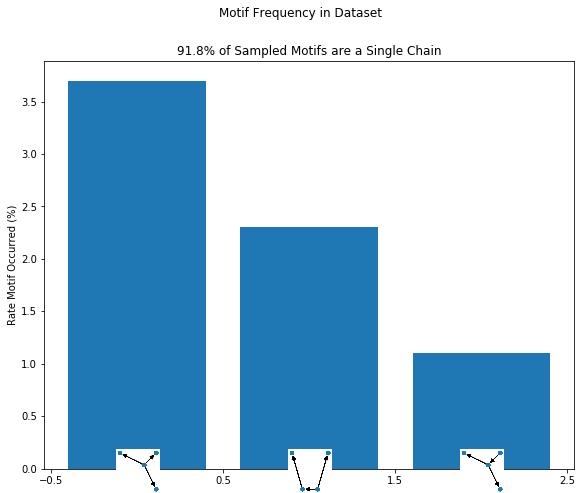

In [250]:
motif_new_active = mf.get_motifs(new_active.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_new_active,motifs_to_show=3)

In [195]:
#",".join(list(new_active.index.astype(str)))

https://github.com/progettoPACS/PROGETTO
https://github.com/ncar-mlso/comp-utilities
https://github.com/feiwhomai/code
https://github.com/usc-isi-i2/Web-Karma
https://github.com/xukan840730/mathematical_optimization
https://github.com/icerupt/icerupt.github.io
https://github.com/danielmusic/bugfree-happiness
https://github.com/jamesmgittins/dopeslingertycoon
https://github.com/it-innovation/sam
https://github.com/sixteencolors/sixteencolors
https://github.com/gs2-2/paper.hub
https://github.com/Opinari/OnTheFenceUI
https://github.com/a-morn/OhLookDiamonds
https://github.com/jihye-eventsource/mvp
https://github.com/concrete5-composer/concrete5-core
https://github.com/Readom/HackerNewsJSON
https://github.com/loxosceles/UNAM-Programacion_Avanzada
https://github.com/kupcimat/SkiSchool
https://github.com/racamirko/Common-Sense-Net-2
https://github.com/pgtogether/webcollection
https://github.com/alok-webonise/alok-assignment
https://github.com/innovacion-DPF/innovacion-DPF.github.io
https://github.com/soyto/soyto.github.io
https://github.com/Echx/CapCalc
https://github.com/jogojokodi/jogojokodi
https://github.com/luiz04nl/liquidity
https://github.com/devvoh/parable
https://github.com/ehbhotel/ehbhotel

In [194]:
old_active = project[(project.owner_age>700)&(project.commits>100)]
print(len(old_active))
old_active.head()

121


,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
52097,558,36,6,0,537,817.0
64153,202,4,0,0,54,733.0
148304,257,2,0,0,0,1372.0
182512,129,3,0,0,0,1774.0
208321,147,11,0,0,74,779.0


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

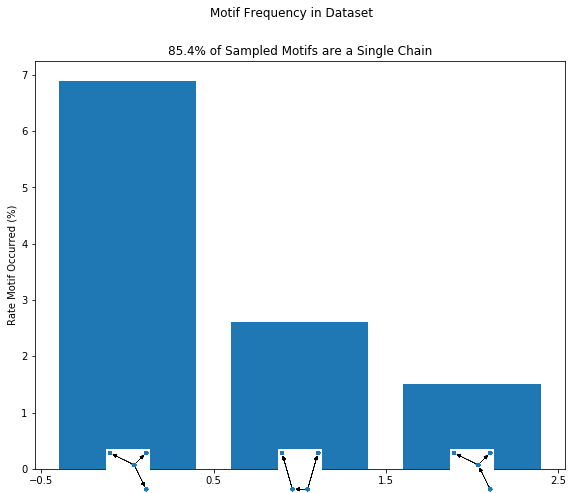

In [251]:
motif_old_active = mf.get_motifs(old_active.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_old_active,motifs_to_show=3)

In [198]:
#",".join(list(old_active.sample(25).index.astype(str)))

https://github.com/tianocore/edk2-OvmfPkg
https://github.com/mattcg/cjsDelivery
https://github.com/art-vybor/twnews
https://github.com/ericrowan/ericrowan.github.io
https://github.com/creilly/sitzlabexpcontrol
https://github.com/stackbuilders/inflections-hs
https://github.com/evgeny-myasishchev/juliapagano
https://github.com/angular/protractor
https://github.com/nyanp/tiny-cnn
https://github.com/trackway-project/trackway
https://github.com/hashbang/shell-etc
https://github.com/ubpb/katalog
https://github.com/ssj71/OSC2MIDI
https://github.com/brianmcn/minecraft-map-manipulator
https://github.com/evinstk/TantechEngineOriginal
https://github.com/udacity/responsive-images
https://github.com/kaidez/kdz
https://github.com/klpdotorg/dubdubdub
https://github.com/Essomia/template-simplify
https://github.com/TimBuckley/appa-hacktathon
https://github.com/AlbertArion/com.ucourse
https://github.com/brunoseivam/ADEiger
https://github.com/mildred/alien
https://github.com/the-domains/kim-kenefsky
https://github.com/flappyport/flappyport